Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/E-commerce Customer Behavior.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
# finding the number of rows and columns
customer_data.shape

(350, 11)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [11]:
# data cleaning
# Dropping rows with missing values in 'Satisfaction Level'
customer_data = customer_data.dropna(subset=['Satisfaction Level'])

# Verify that there are no more missing values
print(customer_data.isnull().sum())


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


#Encoding categorical variable

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoders = {}
for column in ['Gender', 'City', 'Membership Type', 'Satisfaction Level']:
    le = LabelEncoder()
    customer_data[column] = le.fit_transform(customer_data[column])
    label_encoders[column] = le


#Feature Selection

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features = ['Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']

# Normalizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])


# Applying Kmeans clustering

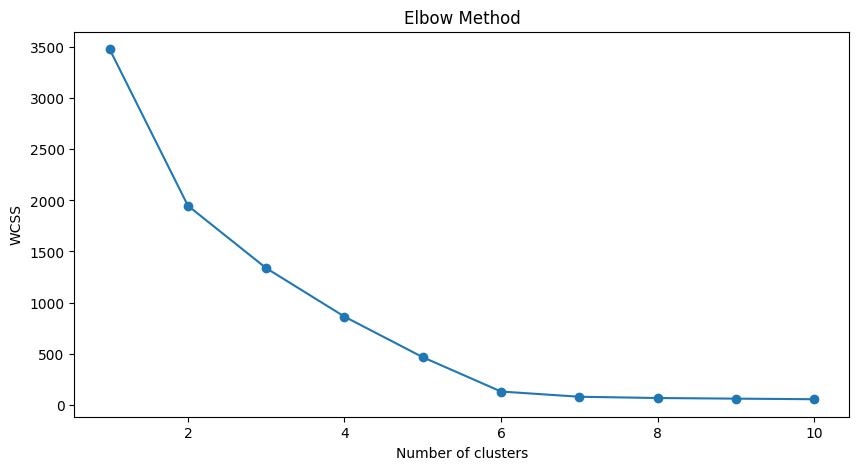

In [14]:
# Using the Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
# Applying K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original dataframe
customer_data['Cluster'] = clusters


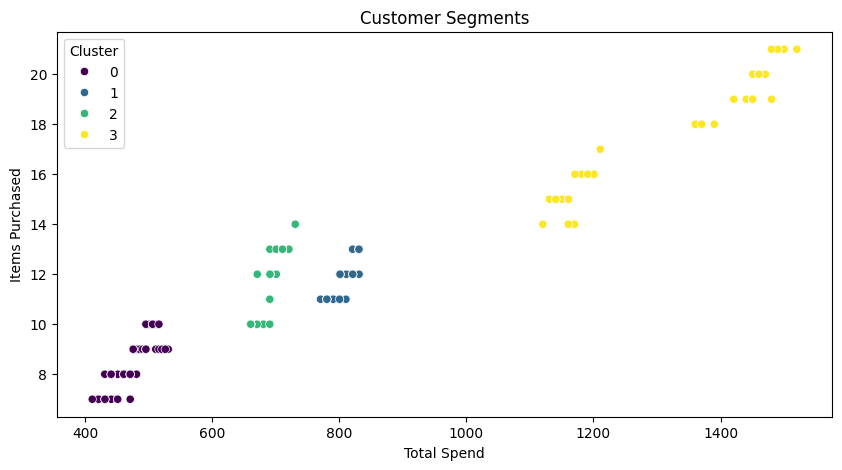

In [16]:
# Plotting the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_data['Total Spend'], y=customer_data['Items Purchased'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.legend(title='Cluster')
plt.show()
